# Deep Learning Challenge (optional)

![](../../public/titanic_intro.png)

In the early 20th century, the RMS Titanic was the pinnacle of luxury and innovation, a marvel of modern engineering. It was hailed as the "unsinkable" ship, carrying over 2,200 passengers and crew on its maiden voyage across the Atlantic. However, in the icy waters of the North Atlantic, disaster struck, and the unthinkable happened—the Titanic collided with an iceberg and sank, leading to one of the most tragic maritime disasters in history.

Now, over a century later, you are tasked with an important mission: to delve into the historical data and build a predictive model that could have foretold the fate of the passengers aboard the Titanic. This dataset contains detailed records of the passengers, including information such as age, gender, ticket class, family size, and more. **Your goal is to develop a neural network model that accurately predicts whether a passenger would have survived or perished on that fateful night.**

Your predictive model won't just be a technical achievement; it will serve as a lens through which we can better understand the human factors and decisions that played a critical role in survival. As you work through this challenge, you’ll follow the standard deep learning workflow, applying your skills to each stage:

- Data Collection: The data you need has already been gathered from historical records.
- Data Preprocessing: Clean and prepare the data for analysis (partially done for you).
- Exploratory Data Analysis (EDA): Investigate the data and uncover key patterns (partially done for you).
- Feature Engineering: Create or modify features to enhance your model’s performance (paritally done for you).
- Model Architecture Design: Choose an appropriate structure for your neural network model.
- Training: Train your model using the provided dataset.
- Evaluation: Assess your model's accuracy using a validation set and other techniques.
- Hyperparameter Tuning: Fine-tune the model’s parameters to improve performance.
- Model Testing: Test your final model on a separate test set.

In [1]:
import numpy as np
import random
import torch

seed = 420

random.seed(seed)
np.random.seed(seed)

# Set a seed for PyTorch
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # for multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# sibsp        # number of siblings / spouses aboard the Titanic 	
# parch        # number of parents / children aboard the Titanic 	
# ticket       # Ticket number 	
# fare         # Passenger fare
# cabin        # Cabin number
# embark_town  # Port of Embarkation 	

#sibsp: The dataset defines family relations in this way:
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way:
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

# load titanic dataset (DO NOT MODIFY)
df = sns.load_dataset("titanic")

## Exploratory Data Analysis
Provided below is some starter code to help familiarize yourself with the Titanic dataset. Further data analysis is encouraged but not required.

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0


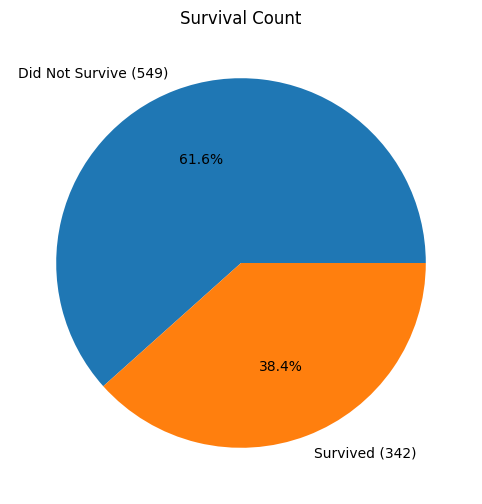

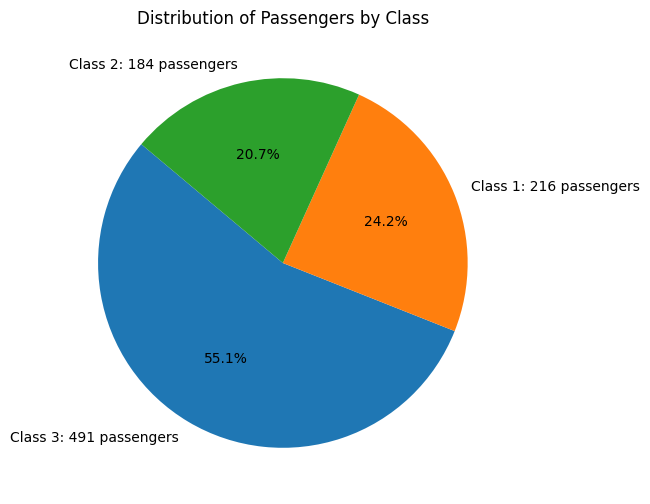

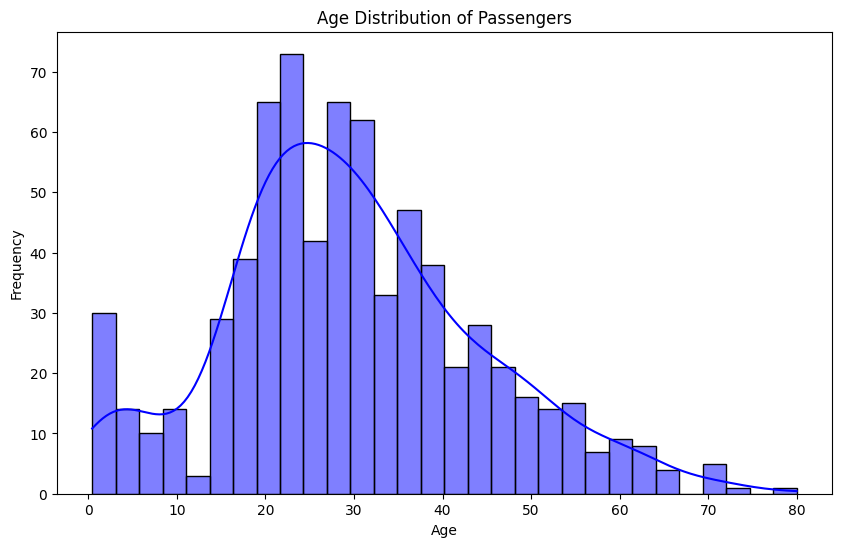

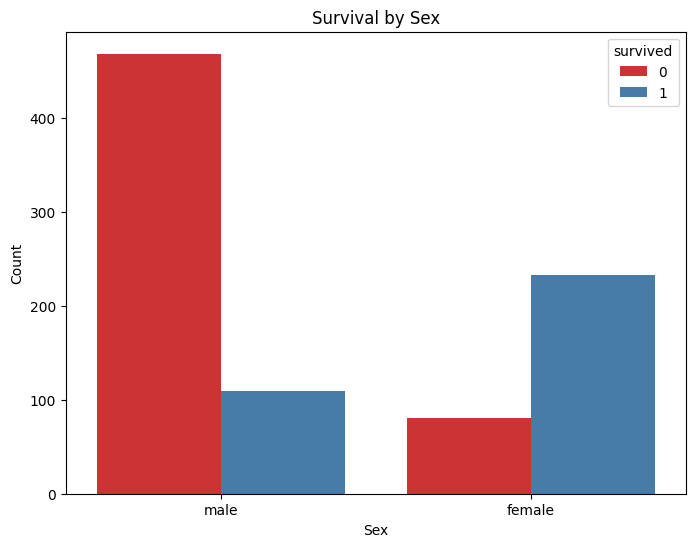

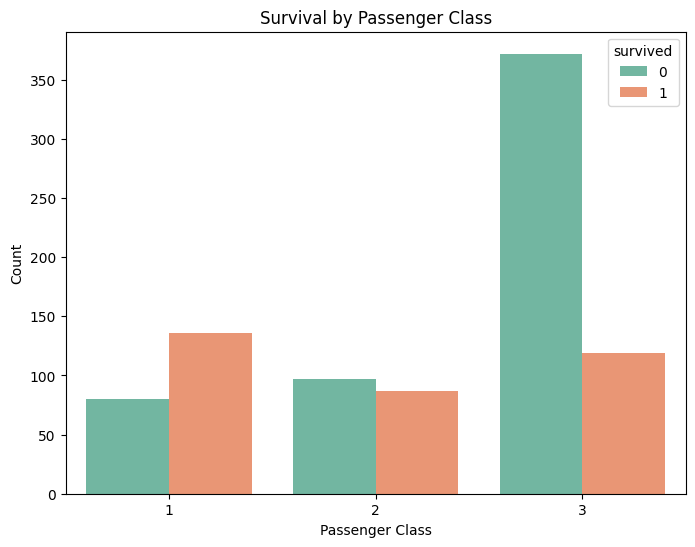

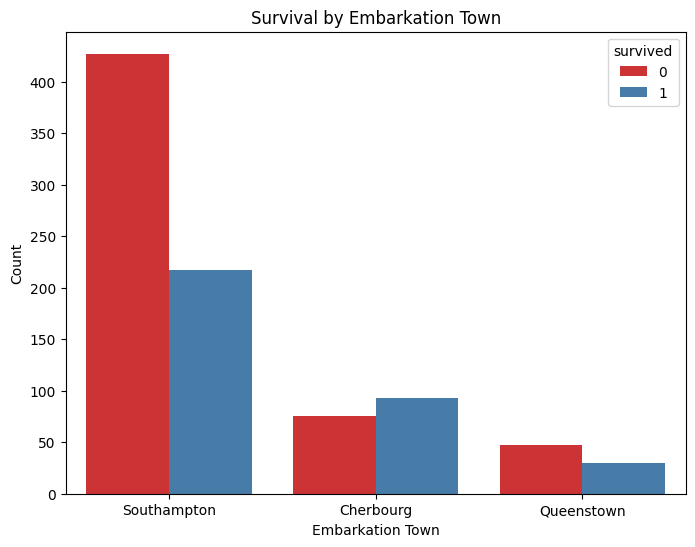

In [4]:
print(df.head())

##############################
# Uncomment code to see output
##############################

print(df.shape)
print(df.isna().sum())
df.describe()

# Pie Chart for Survived
plt.figure(figsize=(8, 6))
plt.pie(df["survived"].value_counts(), labels=[f"Did Not Survive ({df.shape[0]-df['survived'].sum()})", f"Survived ({df['survived'].sum()})"], autopct='%1.1f%%')
plt.title('Survival Count')
plt.show()

# Pie Chart for Pclass
pclass_counts = df['pclass'].value_counts()
labels = [f'Class {cls}: {count} passengers' for cls, count in zip(pclass_counts.index, pclass_counts.values)]
plt.figure(figsize=(8, 6))
plt.pie(pclass_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Passengers by Class')
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='survived', data=df, palette='Set1')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Survival by Passenger Class
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df, palette='Set2')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Survival by Embark Town
plt.figure(figsize=(8, 6))
sns.countplot(x='embark_town', hue='survived', data=df, palette='Set1')
plt.title('Survival by Embarkation Town')
plt.xlabel('Embarkation Town')
plt.ylabel('Count')
plt.show()

## Data Preprocessing and Feature Engineering

In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
# drop columns that are redundant or contain many NaN values
df = df.drop(["pclass", "alive", "embarked", "alone", "adult_male", "deck", "age"], axis = 1)
df = df.dropna(subset=["embark_town"])

# TODO: Further data preprocessing (optional)


In [7]:
# One Hot Encode categorical variables
df["sex"] = df["sex"].map({"male": 0, "female": 1})
for label in ["class", "who", "embark_town"]:
    df = df.join(pd.get_dummies(df[label], prefix=label))
    df = df.drop(label, axis=1)

# TODO: Further feature engineering (optional)

---
## Model Development

Check out the sections below marked `TODO` to get started on developing your model. You are free to modify and reformat any of the code provided as you see fit.


We will be using PyTorch for creating our deep learning model. 
### PyTorch Resources:
[torch.nn documentation](https://pytorch.org/docs/stable/nn.html)

[torch.nn.Sequential() documentation](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)


---

In [8]:
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import RandomSampler, SequentialSampler

In [9]:

train_size = 0.5
validation_size = 0.3
test_size = 0.2

# Note the inclusion of a validation set. This allows 
# for unbiased evaluation during model development,
# ensuring the test data remains unseen until final
# assessment. The validation set is used repeatedly
# during the model tuning process, whereas the test
# set provides an independent evaluation once the
# model is finalized.

### --------------------------------------------END TODO 1/4

X = df.drop(columns=['survived'])
y = df['survived']

def to_torch_tensor(X: pd.DataFrame, y: pd.Series) -> torch.Tensor:
    return (torch.tensor(X.to_numpy(dtype=np.float32), dtype=torch.float32),
            torch.tensor(y.to_numpy(dtype=np.float32), dtype=torch.float32).unsqueeze(1))

X, y = to_torch_tensor(X, y)

# Split data into train, validation, and test sets
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=seed, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=validation_size/(test_size+validation_size), random_state=seed, stratify=y_test)

print(f'Training set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

# (optional) Standardize the data (using the training mean and std)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
X_train = torch.tensor(scaler.fit_transform(X_train), dtype=torch.float32)
X_val = torch.tensor(scaler.transform(X_val), dtype=torch.float32)
X_test = torch.tensor(scaler.transform(X_test), dtype=torch.float32)

Training set size: 444
Validation set size: 267
Test set size: 178


In [10]:
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_sampler = RandomSampler(train_dataset, replacement=False, generator=torch.Generator().manual_seed(seed))
val_sampler = RandomSampler(val_dataset, replacement=False, generator=torch.Generator().manual_seed(seed))
test_sampler = RandomSampler(test_dataset, replacement=False, generator=torch.Generator().manual_seed(seed))

In [11]:
class TitanicNN(nn.Module):
    def __init__(self, input_size=None, hidden_sizes=None, dropout_rate=0.3, use_batch_norm=True):
        super(TitanicNN, self).__init__()
        
        if input_size is None:
            input_size = X.shape[1] # X MUST BE GLBOALLY DEFINED
        if hidden_sizes is None:
            hidden_sizes = [64, 32, 16]
        
        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()
        self.use_batch_norm = use_batch_norm
        
        # Input layer
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        if use_batch_norm:
            self.batch_norms.append(nn.BatchNorm1d(hidden_sizes[0]))
        
        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            if use_batch_norm:
                self.batch_norms.append(nn.BatchNorm1d(hidden_sizes[i]))
        
        # Output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], 1))
        
        # Dropout and activation functions
        self.dropout = nn.Dropout(dropout_rate)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):  # All layers except the last one
            x = layer(x)
            if self.use_batch_norm:
                x = self.batch_norms[i](x)
            x = self.relu(x)
            x = self.dropout(x)
        
        x = self.layers[-1](x)
        x = self.sigmoid(x)
        return x


# Usage with custom parameters:
# model = TitanicNN(
#     input_size=X.shape[1],
#     hidden_sizes=[128, 64, 32],
#     dropout_rate=0.5,
#     use_batch_norm=False
# )

In [12]:


# modify hyperparameters (choice of optimizer, learning rate, etc.)
### ---------------------------------------------------------------------------

# Adjust learning rate
lr = 1e-3

# Batch Size: the number of training samples
# in one forward/backward pass. Smaller batch size
# may result in more noise when calculating errors,
# while larger batch sizes obtain a more accurate
# estimate of the true gradient at the cost of
# computation time
batch_size = 32

# Add weight decay for regularization
weight_decay = 0

# Experiment with different dropout rates
dropout_rate = 0

# Epochs: the number of complete passes of the training dataset
epochs = 50

# Learning Rate: determines step size at each
# iteration of optimizer
lr = 1e-3

# Try different loss functions
loss_function = nn.BCELoss()
# loss_function = nn.BCEWithLogitsLoss()


model = TitanicNN()


# Experiment with different optimizers
# optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0, amsgrad=False)
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-4)


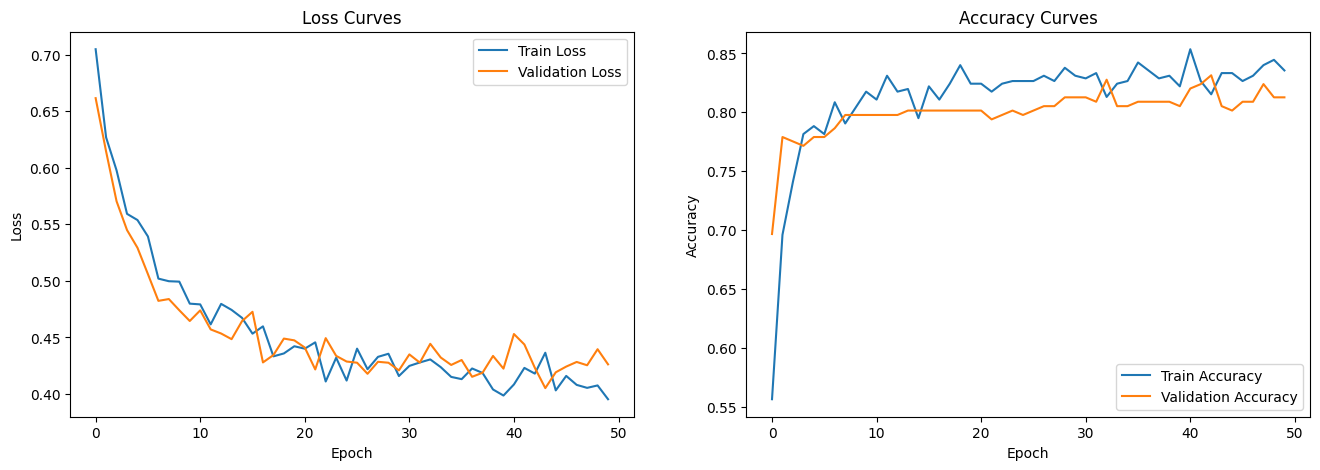

Train Loss: 0.3953
Validation Loss: 0.4262
Train Accuracy: 0.8356
Validation Accuracy: 0.8127


In [13]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(val_dataset, batch_size=batch_size, sampler=val_sampler)
test_loader = DataLoader(test_dataset, batch_size=y_test.shape[0], sampler=test_sampler)

def train_validate(train_loader: DataLoader, val_loader: DataLoader, model: nn.Module, loss_function: nn.Module, optimizer: torch.optim.Optimizer):
    """
    Runs a single epoch of training and validation for a given model.

    This function trains the model for one epoch using the provided training data, 
    computes the loss, performs backpropagation, and updates the model's parameters. 
    It also evaluates the model on the validation set and returns the average training 
    and validation losses and accuracies for the epoch.

    Args:
        train_loader: DataLoader for the training dataset. 
            Contains batches of input data and corresponding labels.
        val_loader: DataLoader for the validation dataset. 
            Contains batches of input data and corresponding labels.
        model: The neural network model to be trained and validated.
        loss_function: Loss function to be used for computing the loss. 
            For example, `torch.nn.CrossEntropyLoss` or `torch.nn.BCELoss`.
        optimizer: Optimizer for updating the model's parameters 
            based on the computed gradients. For example, `torch.optim.Adam` or `torch.optim.SGD`.

    Returns:
        tuple: A tuple containing:
            - train_loss (float): The average loss over the training dataset for this epoch.
            - val_loss (float): The average loss over the validation dataset for this epoch.
            - train_accuracy (float): The accuracy over the training dataset for this epoch.

    """
    size = len(train_loader.dataset)
    model.train()
    running_loss, train_accuracy = 0, 0
    for batch, (X, y) in enumerate(train_loader):

        # Compute prediction error
        pred = model(X)
        loss = loss_function(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
        # Convert probabilities to binary predictions
        pred_binary = (pred > 0.5).float()
        correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
        train_accuracy += correct_predictions
    
    train_loss = running_loss / len(train_loader)
    train_accuracy /= size

    size = len(val_loader.dataset)
    num_batches = len(val_loader)
    model.eval()
    val_loss, val_accuracy = 0, 0
    with torch.no_grad():
        for X, y in val_loader:
            pred = model(X)
            val_loss += loss_function(pred, y).item()

            # Convert probabilities to binary predictions
            pred_binary = (pred > 0.5).float()
            correct_predictions = (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
            val_accuracy += correct_predictions

    val_loss /= num_batches
    val_accuracy /= size
    return train_loss, val_loss, train_accuracy, val_accuracy

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for t in range(epochs):
    train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, loss_function, optimizer)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

def plot_train_curves(train_losses: list[float], val_losses: list[float], train_accuracies: list[float], val_accuracies: list[float]) -> None:
    plt.figure(figsize=(16, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Curves')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(val_accuracies, label="Validation Accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Curves')
    plt.legend()
    plt.show()

    print(f'Train Loss: {train_losses[-1]:.4f}')
    print(f'Validation Loss: {val_losses[-1]:.4f}')
    print(f'Train Accuracy: {train_accuracies[-1]:.4f}')
    print(f'Validation Accuracy: {val_accuracies[-1]:.4f}')

plot_train_curves(train_losses, val_losses, train_accuracies, val_accuracies)


# Model Testing

After training and optimizing your model, run the below cell to test it on your test dataset. The test function have already been written for you

In [14]:
def test(test_loader, model, loss_function):
    size = len(test_loader.dataset)
    num_batches = len(test_loader)
    model.eval()
    test_loss, correct_predictions = 0, 0
    
    with torch.no_grad():
        for X, y in test_loader:
            pred = model(X)
            test_loss += loss_function(pred, y).item()

            # Convert probabilities to binary predictions
            pred_binary = (pred > 0.5).float()
            correct_predictions += (pred_binary.squeeze(1) == y.squeeze(1)).float().sum().item()
    
    # Average loss and accuracy
    test_loss /= num_batches
    test_accuracy = correct_predictions / size * 100  # Convert to percentage

    print(f"Test Set Metrics:\n Accuracy: {test_accuracy:>0.1f}%\n Loss: {test_loss:>8f} \n")
    
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=y_test.shape[0], shuffle=True)
test(test_loader, model, loss_function)

Test Set Metrics:
 Accuracy: 81.5%
 Loss: 0.396456 



In [15]:
import optuna
from optuna.trial import Trial
import torch.nn.functional as F

sampler = optuna.samplers.TPESampler(seed=seed)  # Deterministic

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
    
    def forward(self, inputs, targets):
        BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-BCE_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * BCE_loss
        return focal_loss.mean()

class HingeLoss(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, outputs, targets):
        outputs = outputs.view(-1)
        return torch.mean(torch.clamp(1 - outputs * (2*targets - 1), min=0))

class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super().__init__()
        self.smooth = smooth
    
    def forward(self, inputs, targets):
        inputs = torch.sigmoid(inputs)
        inputs = inputs.view(-1)
        targets = targets.view(-1)
        intersection = (inputs * targets).sum()
        dice = (2. * intersection + self.smooth) / (inputs.sum() + targets.sum() + self.smooth)
        return 1 - dice

def objective(trial: Trial) -> float:
    # Define the hyperparameters to optimize
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-1, log=True)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32, 64, 128])
    dropout_rate = trial.suggest_float('dropout_rate', 0.05, 0.8)
    hidden_size_1 = trial.suggest_categorical('hidden_size_1', [16, 32, 64, 128])
    hidden_size_2 = trial.suggest_categorical('hidden_size_2', [8, 16, 32, 64])
    loss_function = trial.suggest_categorical('loss_function', ['BCELoss', 'FocalLoss', 'HingeLoss', 'DiceLoss'])
    use_batch_norm = trial.suggest_categorical('use_batch_norm', [True, False])

    # Create the model with the suggested hyperparameters
    model = TitanicNN(
        input_size=X.shape[1],
        hidden_sizes=[hidden_size_1, hidden_size_2],
        dropout_rate=dropout_rate,
        use_batch_norm=use_batch_norm
    )
    
    # Set up the optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    if loss_function == 'BCELoss':
        criterion = nn.BCEWithLogitsLoss()
    elif loss_function == 'FocalLoss':
        criterion = FocalLoss()
    elif loss_function == 'HingeLoss':
        criterion = HingeLoss()
    else:  # 'DiceLoss'
        criterion = DiceLoss()

    # Use the existing data loaders, but update batch size
    train_loader.batch_sampler.batch_size = batch_size
    val_loader.batch_sampler.batch_size = batch_size

    # Train the model
    trial_epochs = 30
    best_val_loss = float('inf')
    best_val_acc = 0
    for epoch in range(trial_epochs):
        train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, model, criterion, optimizer)
        
        # Update the best validation loss and accuracy
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_acc = val_accuracy

    return best_val_acc

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=5)

c:\Users\lunat\Desktop\MDST-Onboarding\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-09-03 11:11:21,345] A new study created in memory with name: no-name-ca607dbb-cf02-49a1-ae4c-d80fae9999e8
[I 2024-09-03 11:11:22,293] Trial 0 finished with value: 0.602996254681648 and parameters: {'lr': 0.00018305586937530753, 'weight_decay': 0.00018414222405857412, 'batch_size': 32, 'dropout_rate': 0.10065319952350314, 'hidden_size_1': 16, 'hidden_size_2': 32, 'loss_function': 'DiceLoss', 'use_batch_norm': True}. Best is trial 0 with value: 0.602996254681648.
[I 2024-09-03 11:11:23,956] Trial 1 finished with value: 0.6179775280898876 and parameters: {'lr': 0.011004159100374396, 'weight_decay': 0.0001610374398178182, 'batch_size': 16, 'dropout_rate': 0.2668911438953148, 'hidden_size_1': 64, 'hidden_size_2': 32, 'l

In [16]:
# Print the best hyperparameters and accuracy
print('Best trial:')
trial = study.best_trial
print(f'  Value: {trial.value}')
print('  Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')

# Train the final model with the best hyperparameters
best_params = study.best_params

Best trial:
  Value: 0.7752808988764045
  Params: 
    lr: 0.019857733886901756
    weight_decay: 2.010111761230178e-05
    batch_size: 16
    dropout_rate: 0.22896138694527624
    hidden_size_1: 16
    hidden_size_2: 64
    loss_function: DiceLoss
    use_batch_norm: False

Hyperparameter Importance:
  hidden_size_2: 0.1972
  use_batch_norm: 0.1492
  batch_size: 0.1432
  dropout_rate: 0.1351
  loss_function: 0.1346
  lr: 0.1120
  weight_decay: 0.0985
  hidden_size_1: 0.0301


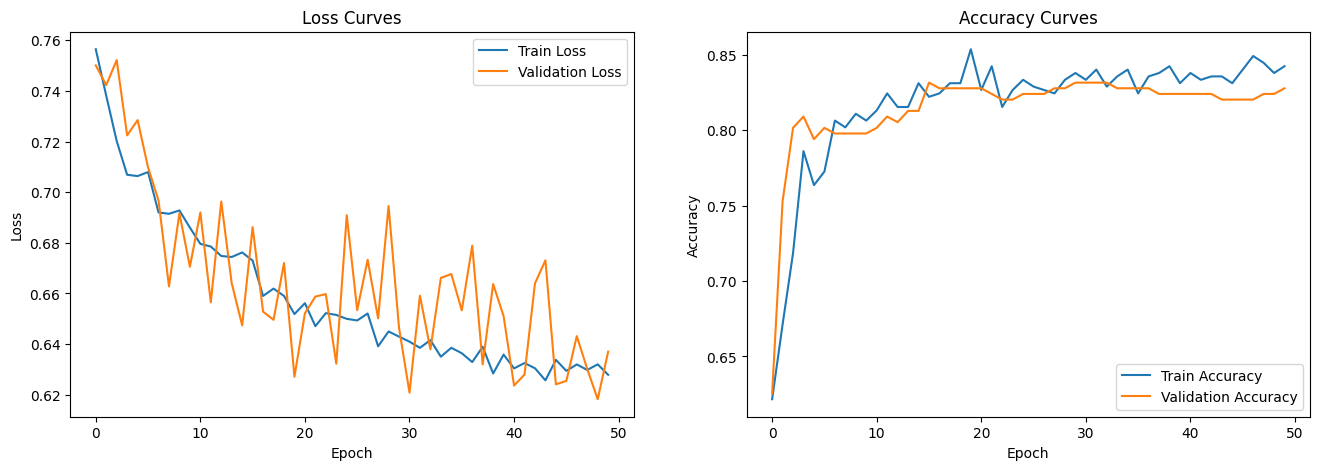

Train Loss: 0.6279
Validation Loss: 0.6370
Train Accuracy: 0.8423
Validation Accuracy: 0.8277


In [ ]:
# Create the final model with the best hyperparameters
final_model = TitanicNN(
    input_size=X.shape[1],
    hidden_sizes=[best_params['hidden_size_1'], best_params['hidden_size_2']],
    dropout_rate=best_params['dropout_rate'],
    use_batch_norm=True  # Assuming you want to use batch normalization in the final model
)

# Set up the optimizer and loss function
final_optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['lr'], weight_decay=best_params['weight_decay'])

# Use the best loss function found by Optuna
if best_params['loss_function'] == 'BCELoss':
    final_loss_function = nn.BCEWithLogitsLoss()
elif best_params['loss_function'] == 'FocalLoss':
    final_loss_function = FocalLoss()
elif best_params['loss_function'] == 'HingeLoss':
    final_loss_function = HingeLoss()
else:  # 'DiceLoss'
    final_loss_function = DiceLoss()

# Train the final model
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
for t in range(epochs):
    train_loss, val_loss, train_accuracy, val_accuracy = train_validate(train_loader, val_loader, final_model, final_loss_function, final_optimizer)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

plot_train_curves(train_losses, val_losses, train_accuracies, val_accuracies)

In [ ]:
test(test_loader, final_model, final_loss_function)

Test Set Metrics:
 Accuracy: 83.7%
 Loss: 0.624920 



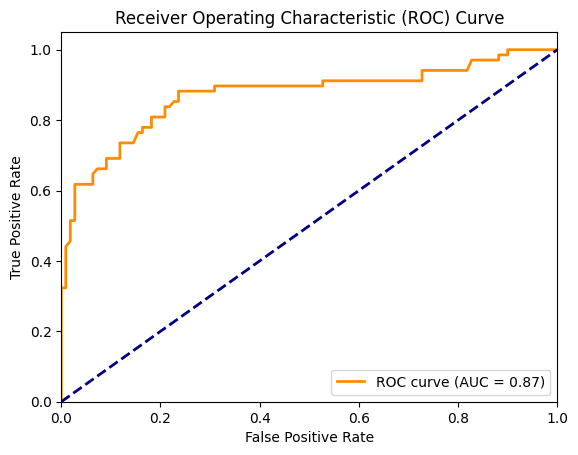

In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc

with torch.no_grad():
    test_predictions = model(X_test)


fpr, tpr, _ = roc_curve(y_test.numpy(), test_predictions.numpy())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()